## **CIFAR-10 (1)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras 

import tensorflow as tf
import sklearn as sk
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import *

from sklearn.preprocessing import *
import seaborn as sns

In [2]:
print(tf.__version__)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(sk.__version__)

2.8.2
1.21.6
1.3.5
0.11.2
1.0.2


In [3]:
from keras.datasets import cifar10

(X_train, Y_train) , (X_test, Y_test) = cifar10.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

170508288/170498071 [==============================] - 13s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

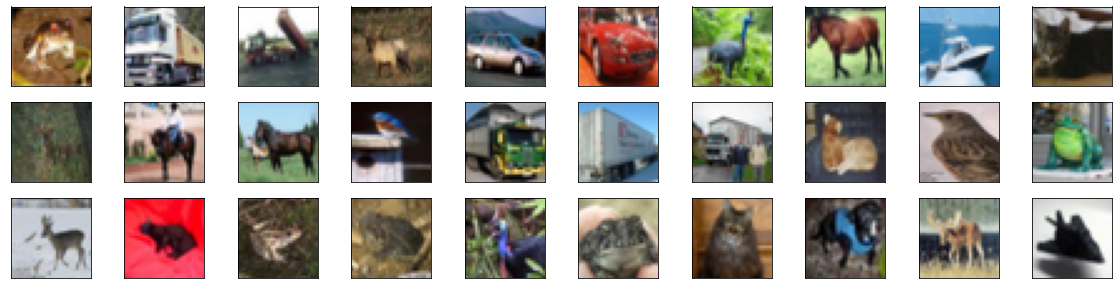

In [4]:
fig = plt.figure(figsize=(20,5))

for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [5]:
print(X_train[0][0:1])

X_train_n = X_train/255.0
X_test_n = X_test /255.0

print(X_train_n[0][0:1])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  [ 68  54  42]
  [ 98  73  52]
  [119  91  63]
  [139 107  75]
  [145 110  80]
  [149 117  89]
  [149 120  93]
  [131 103  77]
  [125  99  76]
  [142 115  91]
  [144 112  86]
  [137 105  79]
  [129  97  71]
  [137 106  79]
  [134 106  76]
  [124  97  64]
  [139 113  78]
  [139 112  75]
  [133 105  69]
  [136 105  74]
  [139 108  77]
  [152 120  89]
  [163 131 100]
  [168 136 108]
  [159 129 102]
  [158 130 104]
  [158 132 108]
  [152 125 102]
  [148 124 103]]]
[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  [0.26666667 0.21176471 0.16470588]
  [0.38431373 0.28627451 0.20392157]
  [0.46666667 0.35686275 0.24705882]
  [0.54509804 0.41960784 0.29411765]
  [0.56862745 0.43137255 0.31372549]
  [0.58431373 0.45882353 0.34901961]
  [0.58431373 0.47058824 0.36470588]
  [0.51372549 0.40392157 0.30196078]
  [0.49019608 0.38823529 0.29803922]
  [0.55686275 0.45098039 0.35686275]
  [0.

In [6]:
print(Y_train[0:3])

Y_train_n = to_categorical(Y_train)
Y_test_n = to_categorical(Y_test)

print(Y_train_n[0:3])

[[6]
 [9]
 [9]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu'))
model.add(MaxPool2D(pool_size=2))

# FCL(fully connected layer)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          32832     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(X_train_n, Y_train_n, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
352/352 [==============================] - 14s 8ms/step - loss: 1.5889 - accuracy: 0.4239 - val_loss: 1.2880 - val_accuracy: 0.5284
Epoch 2/5
352/352 [==============================] - 2s 7ms/step - loss: 1.2218 - accuracy: 0.5630 - val_loss: 1.0983 - val_accuracy: 0.6134
Epoch 3/5
352/352 [==============================] - 2s 7ms/step - loss: 1.0639 - accuracy: 0.6232 - val_loss: 1.0068 - val_accuracy: 0.6508
Epoch 4/5
352/352 [==============================] - 2s 7ms/step - loss: 0.9335 - accuracy: 0.6703 - val_loss: 0.9632 - val_accuracy: 0.6624
Epoch 5/5
352/352 [==============================] - 2s 7ms/step - loss: 0.8529 - accuracy: 0.7006 - val_loss: 0.8833 - val_accuracy: 0.6946


In [10]:
model.evaluate(X_test_n, Y_test_n)

313/313 [==============================] - 1s 3ms/step - loss: 0.9233 - accuracy: 0.6742


[0.9232968688011169, 0.6741999983787537]

## **CIFAR-10 (2)**

## ** 파일이 없음**